# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (14, 11)

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
geoc = pd.read_excel('geo_comment.xlsx')

In [3]:
geoc.head()

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [4]:
geo = pd.read_excel('geo.xlsx')

In [5]:
geo.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [6]:
x = geo.x
y = geo.y

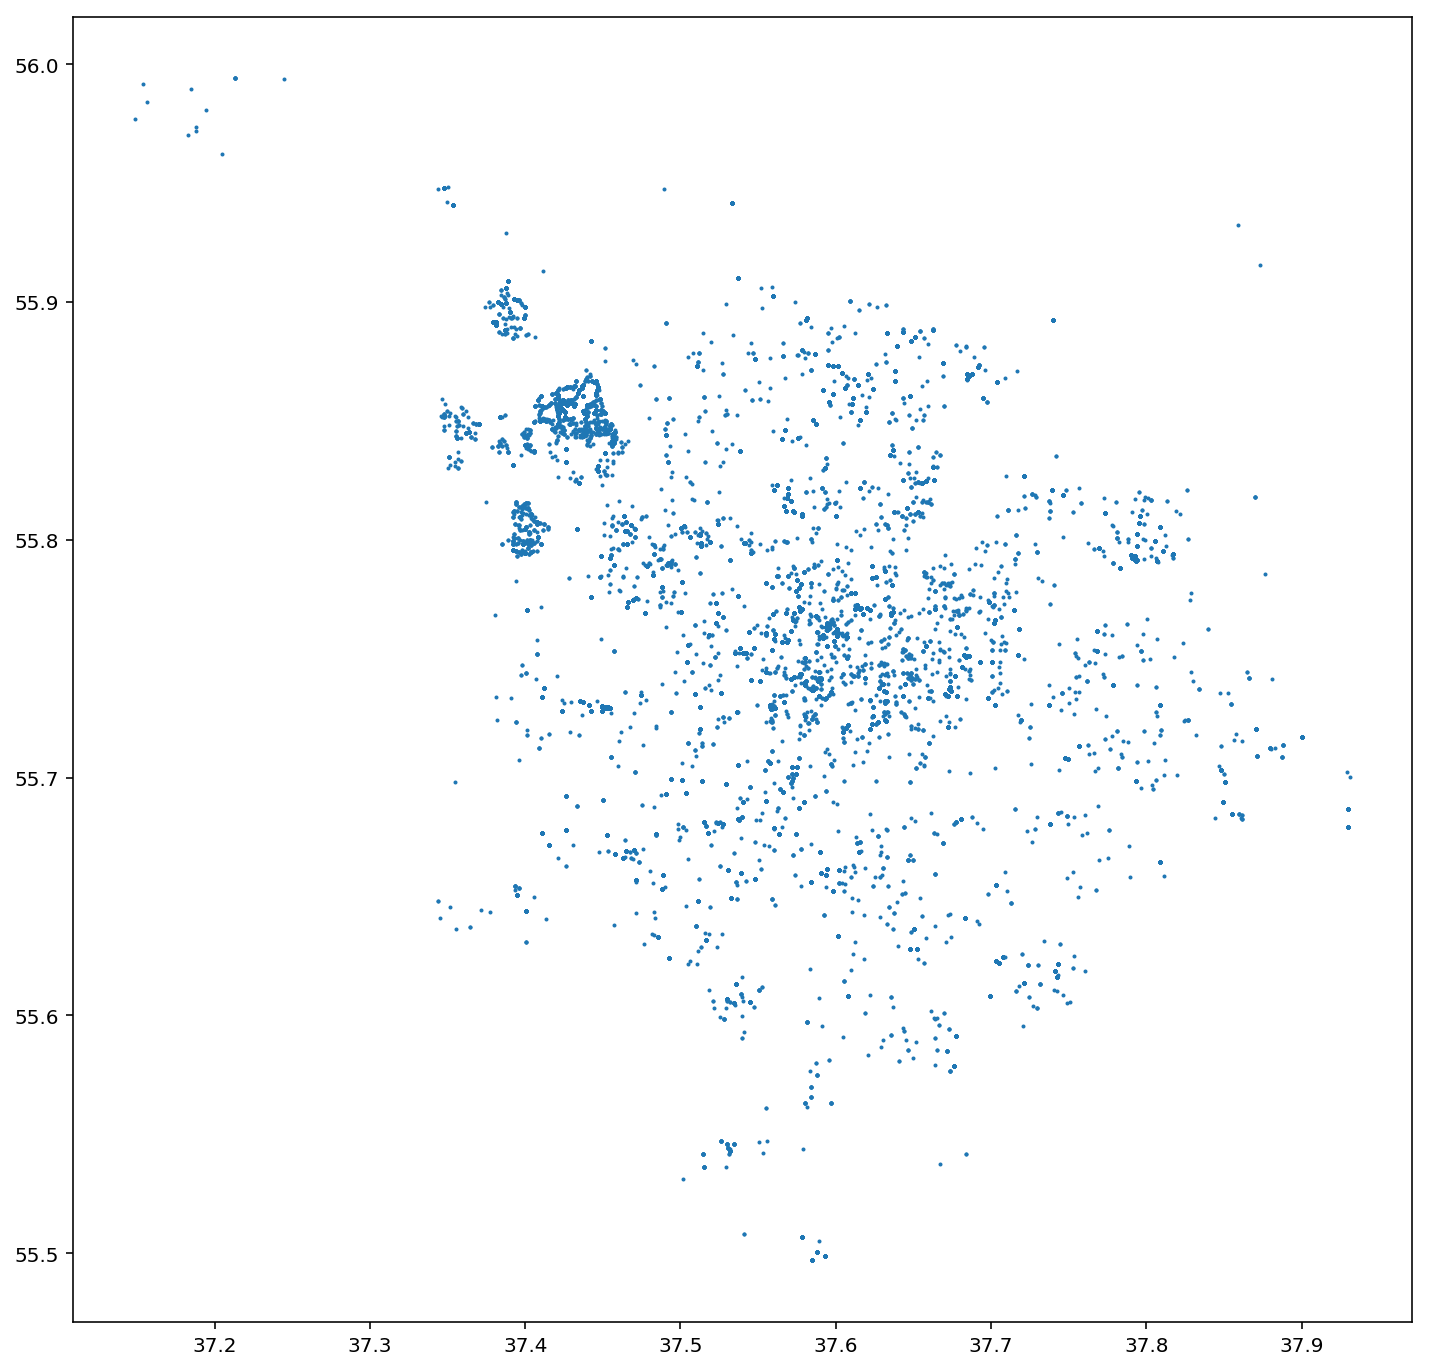

In [7]:
plt.subplots(1, figsize=(12, 12))
plt.scatter(x, y, cmap='autumn', s=1)

In [8]:
clf_kmeans = KMeans(n_clusters=8)

In [9]:
coord = geo.loc[:, ['x','y']]

In [10]:
clusters_kmeans = clf_kmeans.fit_predict(coord, ) 

In [11]:
km= pd.DataFrame(clusters_kmeans)

In [12]:
km[0].value_counts()

1    23929
2    18809
3    18036
6    14298
5    13798
4    10054
0     5977
7     3905
Name: 0, dtype: int64

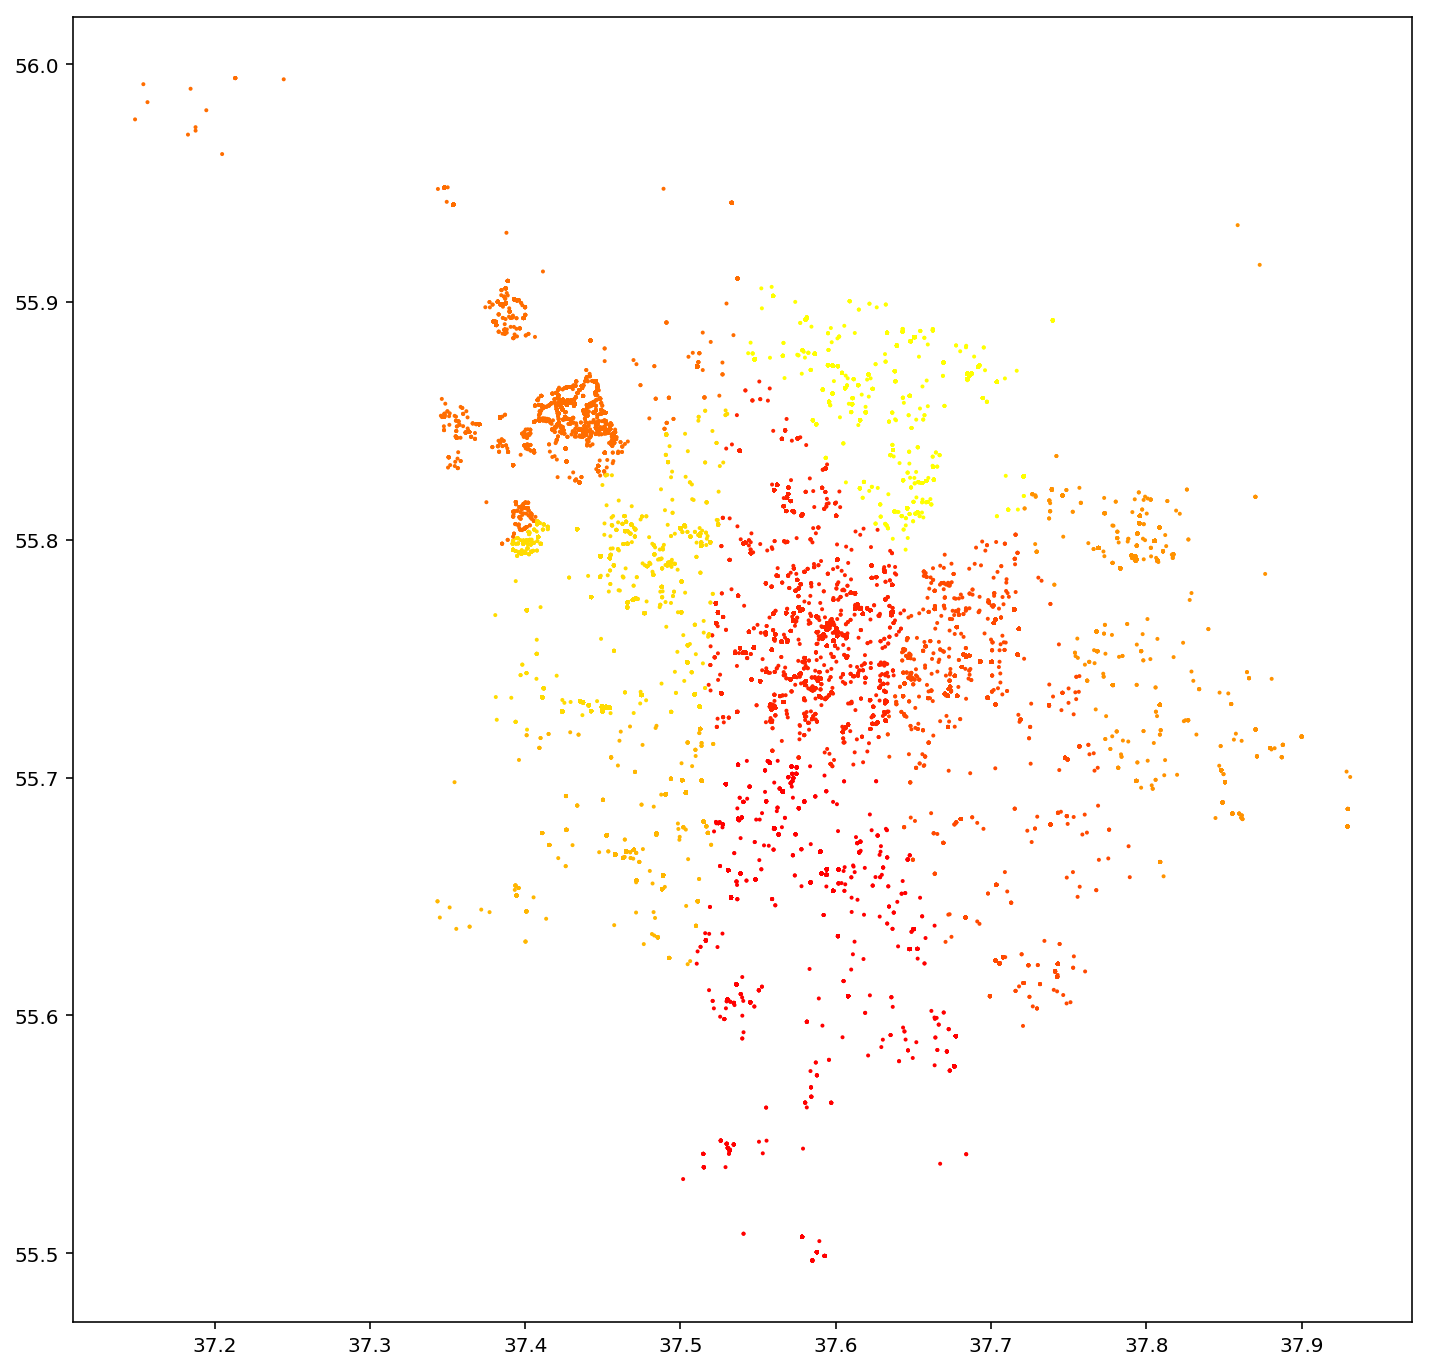

In [13]:
plt.subplots(1, figsize=(12, 12))
plt.scatter(x, y, c=clusters_kmeans, cmap='autumn', s=1)

In [14]:
geo_yes = geo[geo.comment_class == 1]

In [15]:
geo_no = geo[geo.comment_class == -1]

In [16]:
coord_yes = geo_yes.loc[:, ['x','y']]
coord_no = geo_no.loc[:, ['x','y']]

In [17]:
x_yes = geo_yes.x
x_no = geo_no.x
y_yes = geo_yes.y
y_no = geo_no.y

In [18]:
clf_kmeans = KMeans(n_clusters=8)

In [19]:
clusters_kmeans = clf_kmeans.fit_predict(coord_yes, ) 

In [20]:
km= pd.DataFrame(clusters_kmeans)

In [21]:
km[0].value_counts()

7    4735
1    3035
5    1804
2    1232
6    1130
3     740
4     675
0     308
Name: 0, dtype: int64

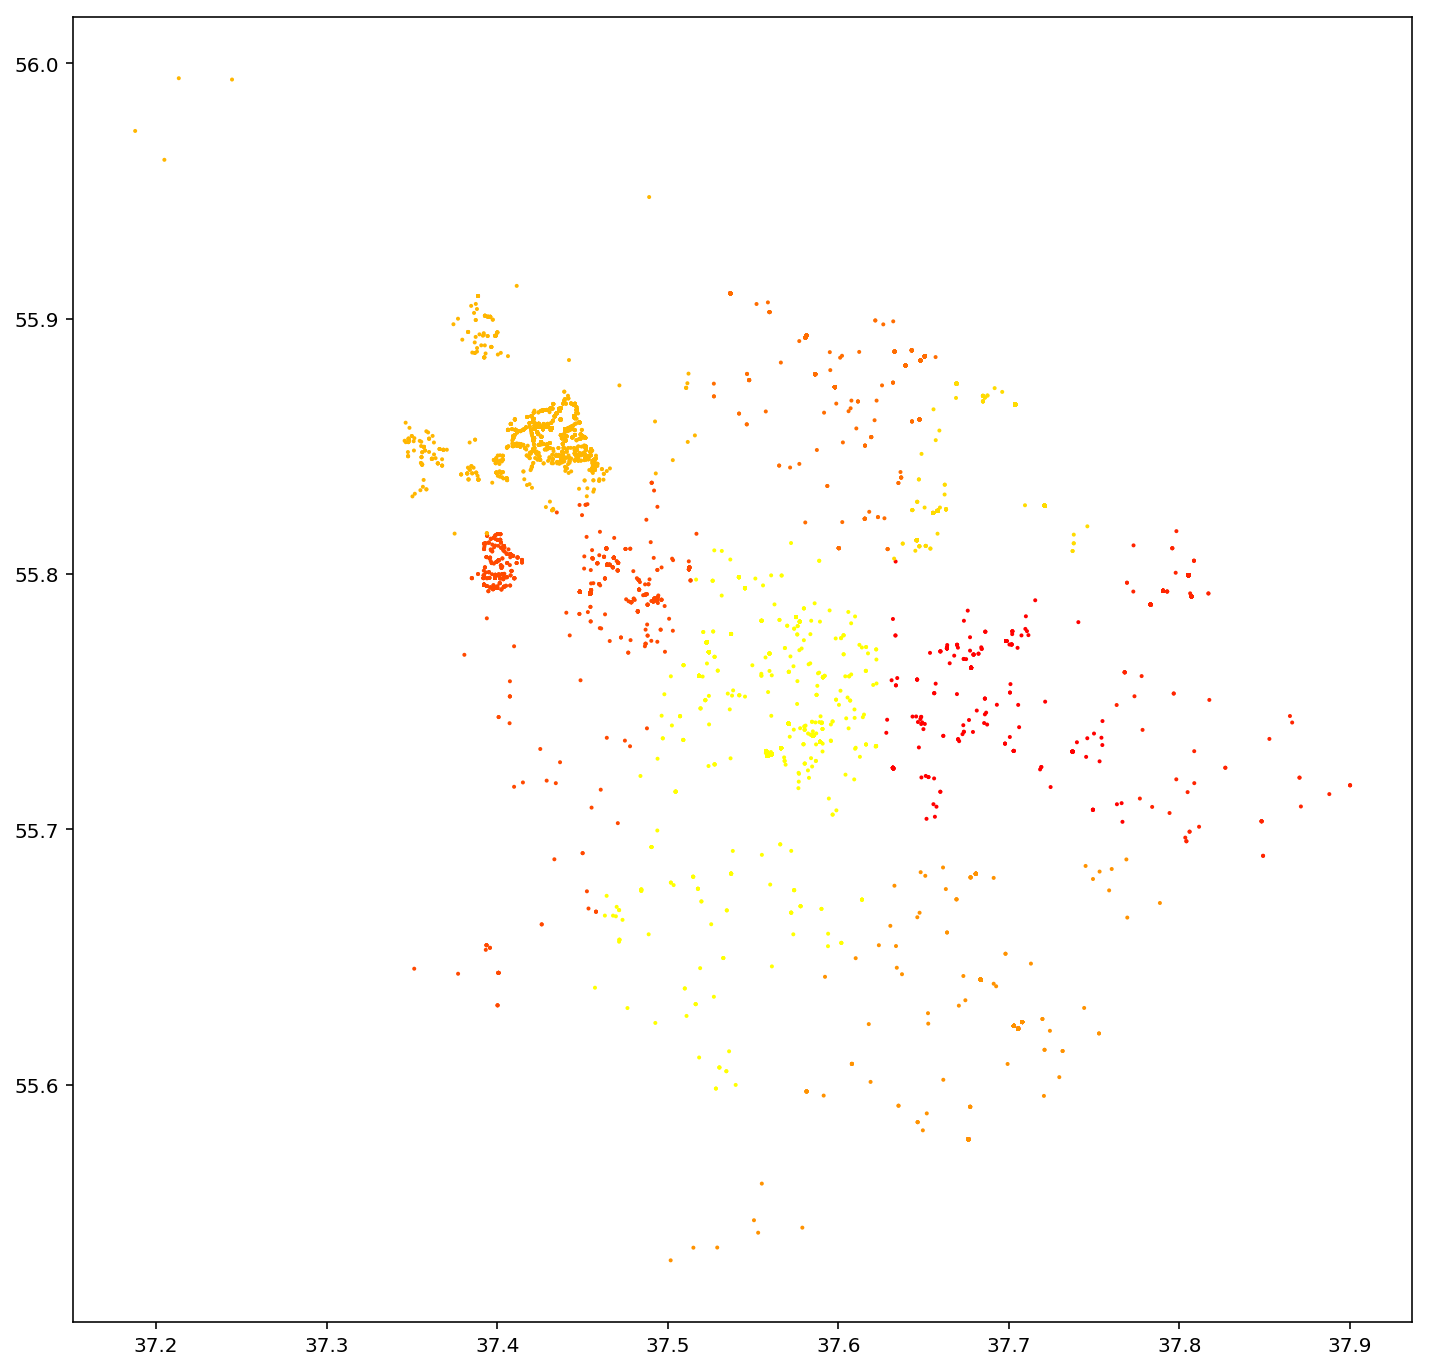

In [22]:
plt.subplots(1, figsize=(12, 12))
plt.scatter(x_yes, y_yes, c=clusters_kmeans, cmap='autumn', s=1)

In [35]:
clf_kmeans = KMeans(n_clusters=8)

In [36]:
clusters_kmeans = clf_kmeans.fit_predict(coord_no, ) 

In [37]:
km= pd.DataFrame(clusters_kmeans)

In [38]:
km[0].value_counts()

2    19504
1    17999
3    16008
7    13709
6    13139
4     7016
0     5793
5     1979
Name: 0, dtype: int64

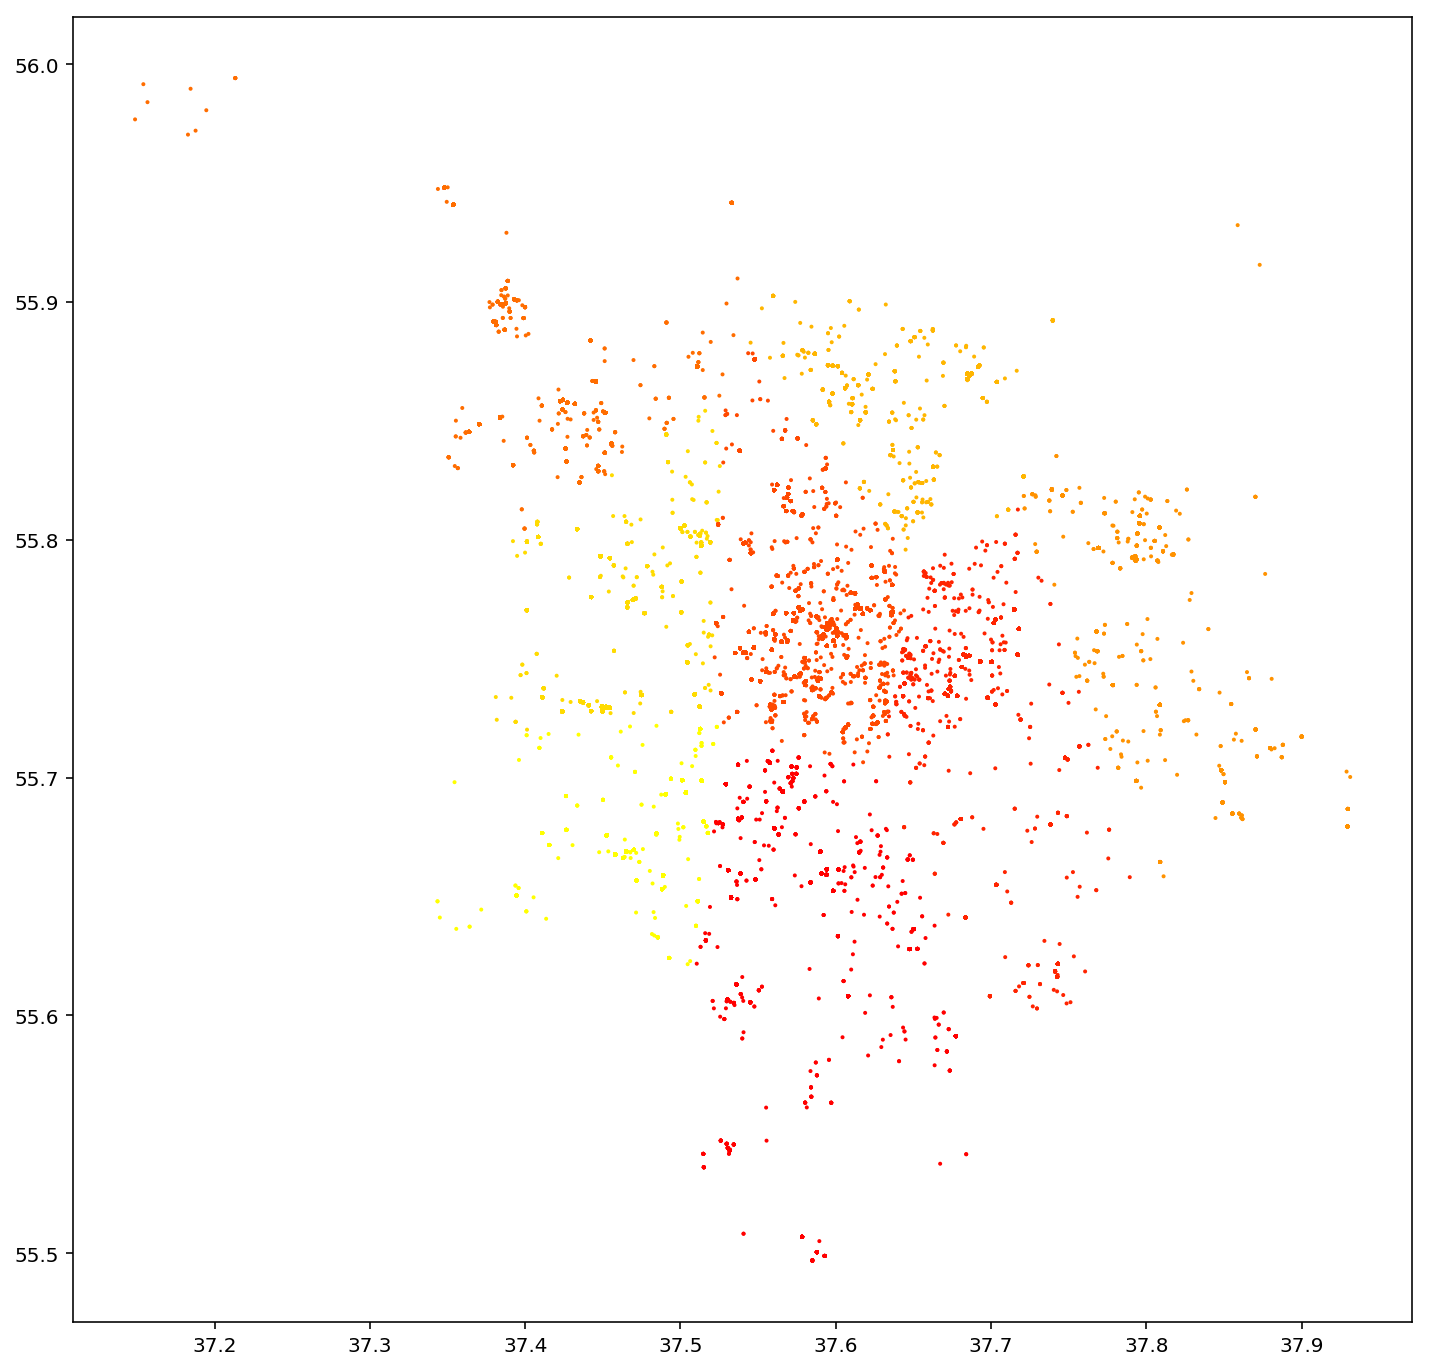

In [39]:
plt.subplots(1, figsize=(12, 12))
plt.scatter(x_no, y_no, c=clusters_kmeans, cmap='autumn', s=1)

In [40]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(coord, ) 
    k_inertia.append(clf_kmeans.inertia_)

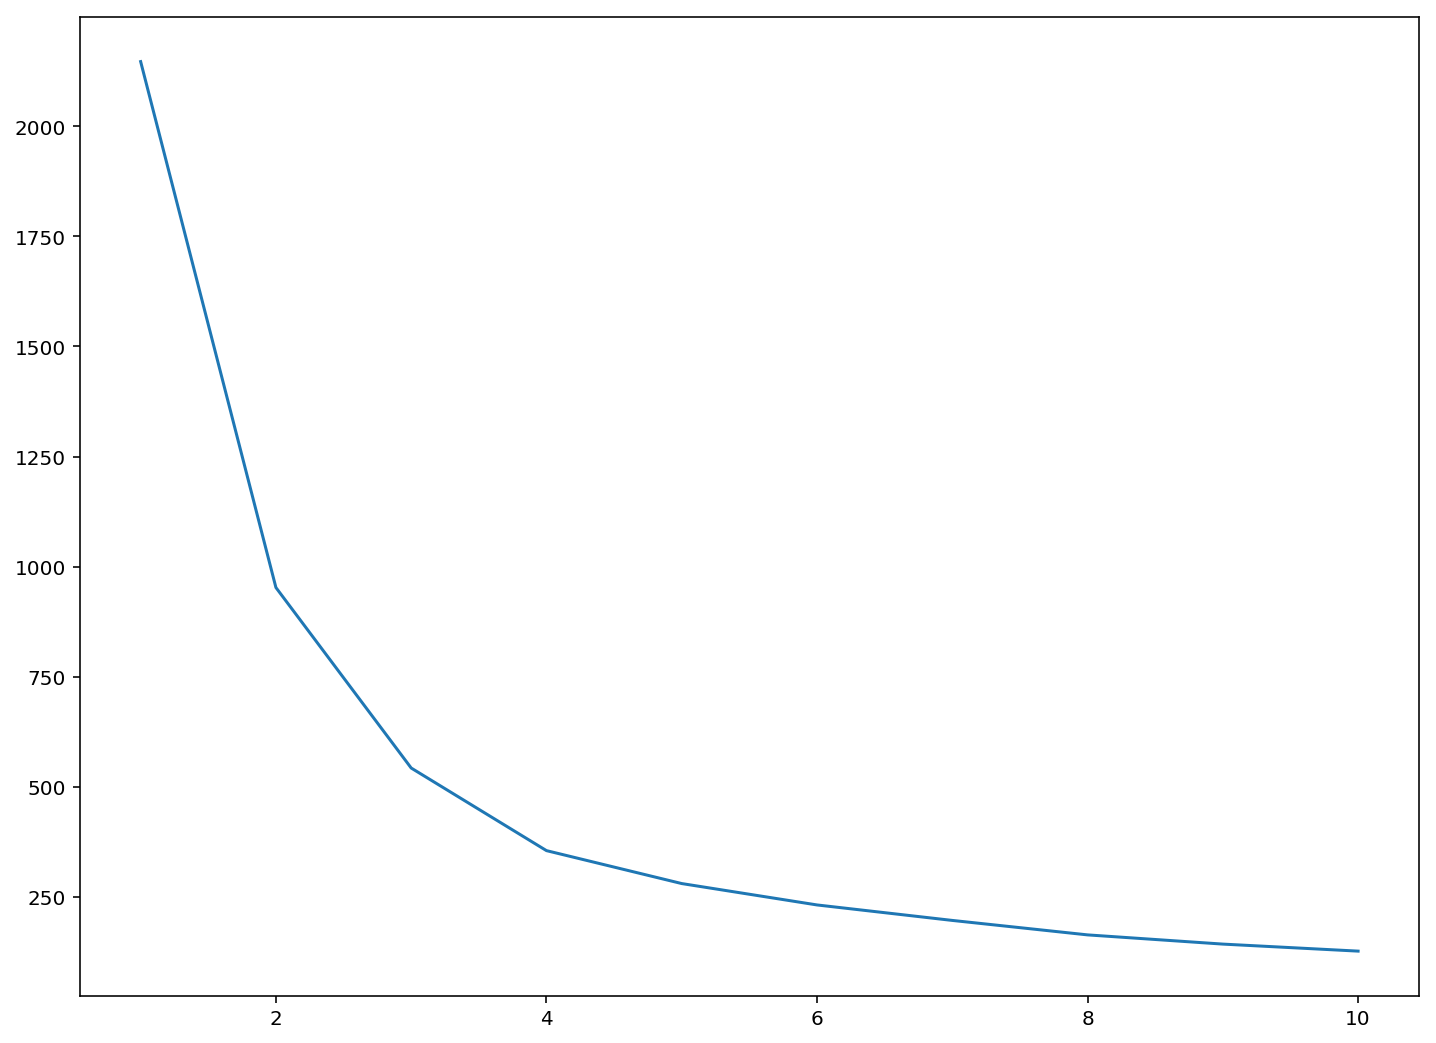

In [41]:
plt.subplots(1, figsize=(12, 9))
plt.plot(ks, k_inertia)

In [42]:
diff = np.diff(k_inertia)

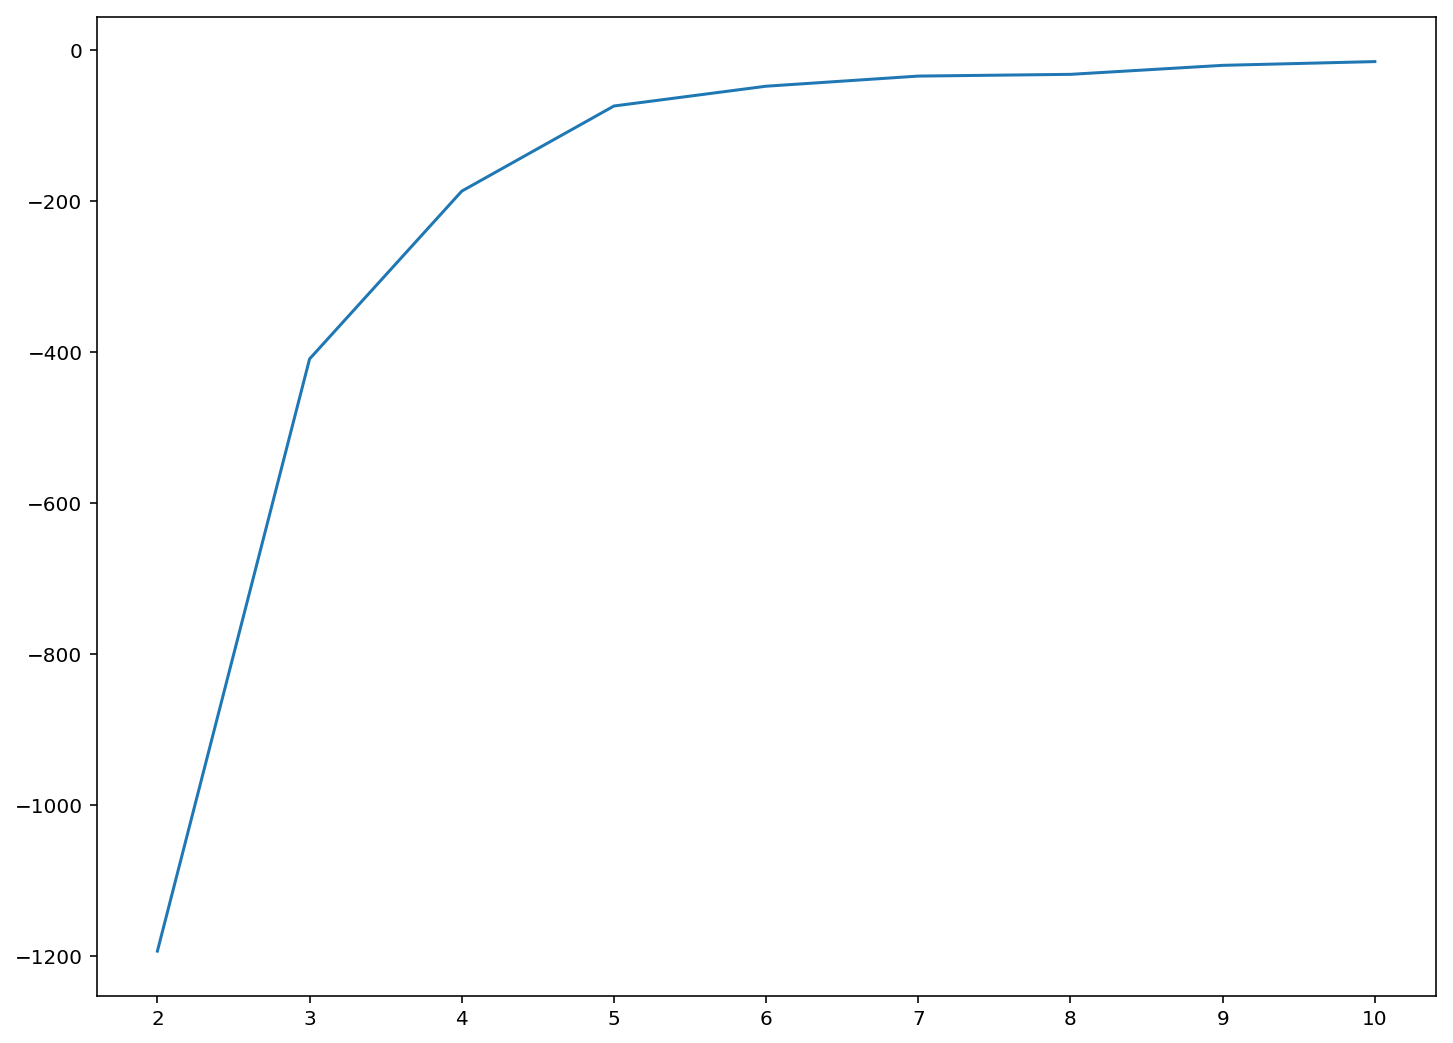

In [43]:
plt.subplots(1, figsize=(12, 9))
plt.plot(ks[1:], diff)

In [44]:
diff_r = diff[1:] / diff[:-1]

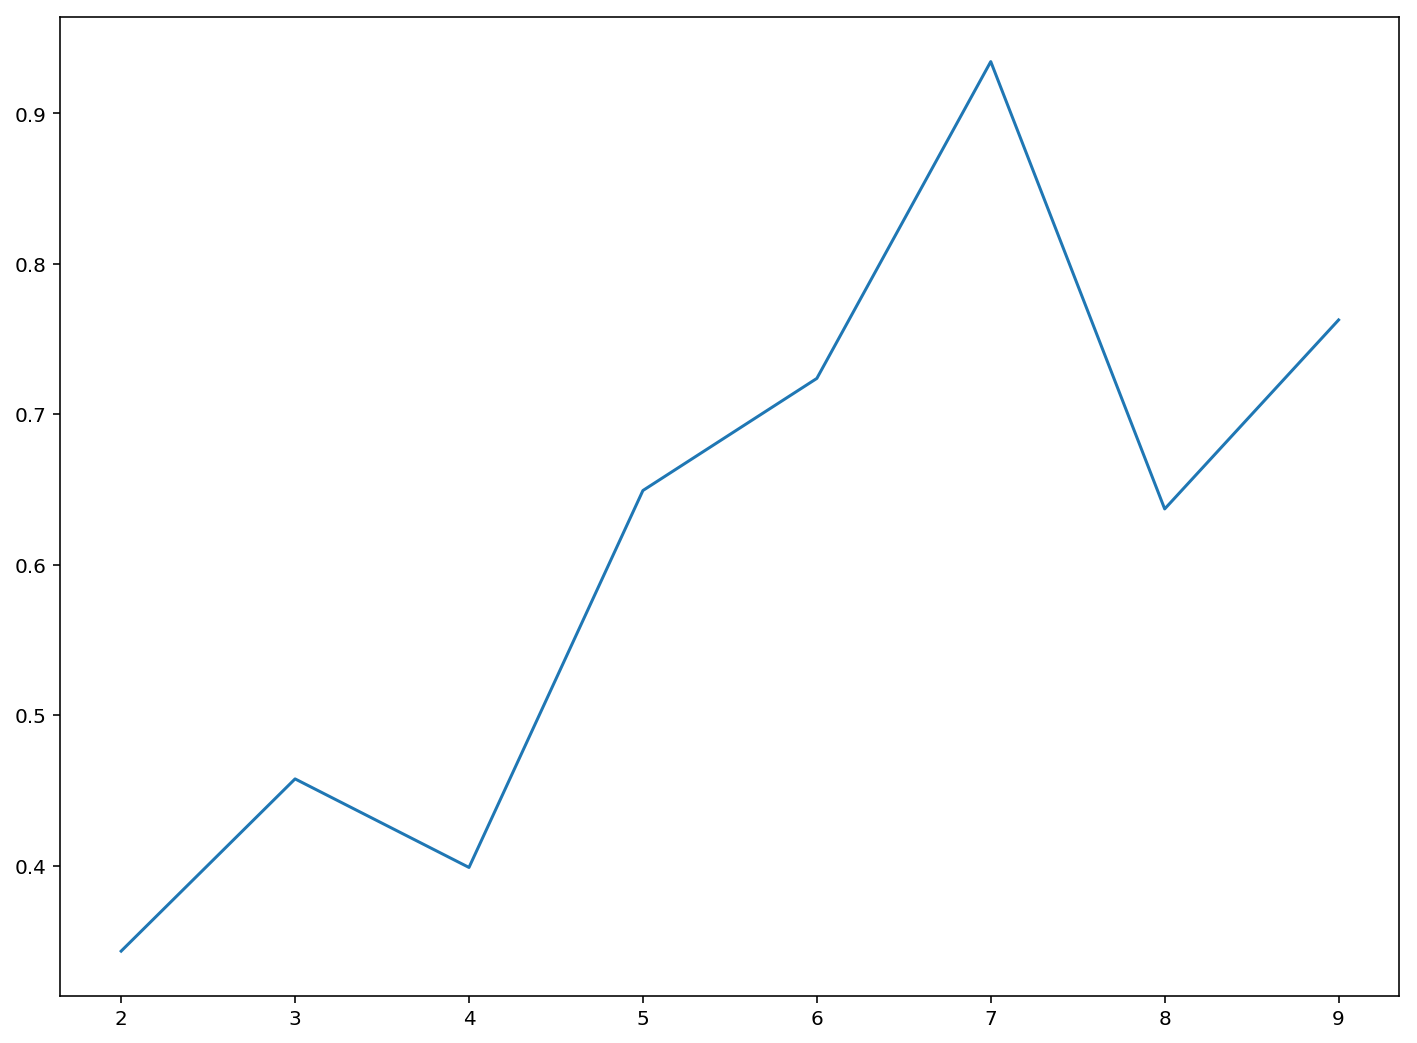

In [45]:
plt.subplots(1, figsize=(12, 9))
plt.plot(ks[1:-1], diff_r)

In [46]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2